In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [3]:
# Add 'overweight' column
df['bmi'] = df['weight'] / (df['height'] ** 2) * 10000
df['overweight'] = df['bmi'].apply(lambda x: 1 if x>25 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.

In [4]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x==1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x==1 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


### Draw Categorical Plot

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. 

In [5]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, value_vars=['active','alco','cholesterol', 'gluc','overweight','smoke'])
df_cat.head()

,variable,value
0,active,1
1,active,1
2,active,0
3,active,1
4,active,0


In [6]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = pd.melt(df, id_vars='cardio', var_name= 'variable', value_vars=['active','alco','cholesterol', 'gluc','overweight','smoke'])
df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


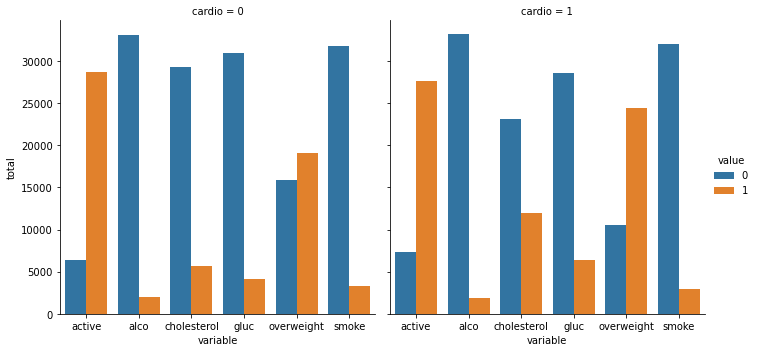

In [7]:
# Draw the catplot with 'sns.catplot()'
sns.catplot(
    data=df_cat, 
    x = 'variable',
    col = 'cardio',
    kind= 'count',
    hue= 'value').set_axis_labels("variable", "total")

### Draw Heat Map

Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile

In [11]:
# Clean the data
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))]

In [12]:
# drop bmi column
df_heat = df_heat.drop(['bmi'], axis=1)

Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle.

<AxesSubplot:>

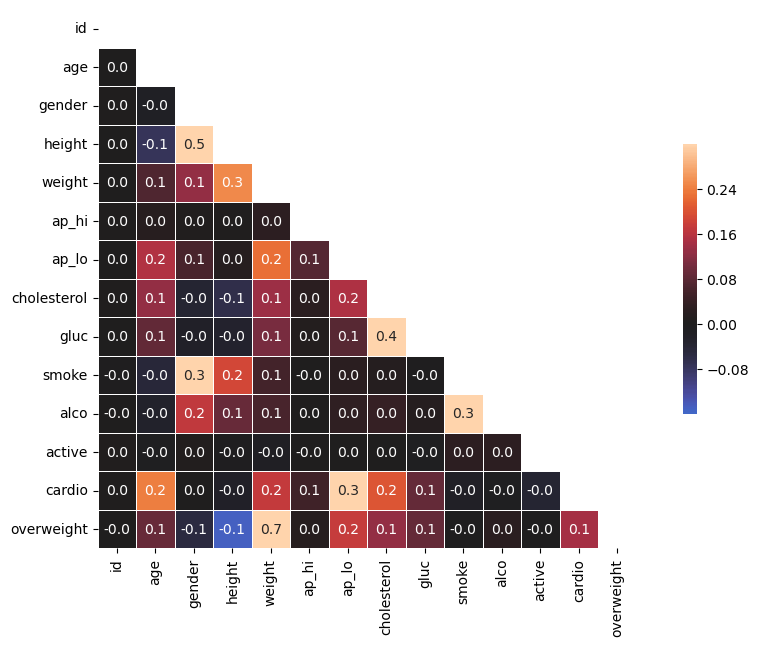

In [22]:
# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (12, 7))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(
    data=corr, 
    vmin=-0.16,vmax=0.32,                                                               # anchor the colormap
    center=0,                                                                           # centered on 0
    annot=True,  fmt='.1f',                                                             # add annot and format
    linewidths=0.5,                                                                     # create line divide cell
    cbar_kws = {'shrink':0.5, 'ticks':[-0.08, 0.0, 0.08, 0.16, 0.24]},                  # customize cbar
    square=True, 
    mask=mask 
    )